This pipeline opens the result of ICAalamelodic.m, lets the user interactively label the components that look like neuronal activity (rather than movement artefacts or noise), sort them by label, plots a final summary for the chosen components, and save the reordered maps and time series.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
%matplotlib inline 
import pylab

Open time series

In [2]:
import scipy.io as sio

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/New Volume/100621ss2series/100621ss2oncregcdFF20spsfkfconcatMB116Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)

In [8]:
DT=Ua['TSmean']

In [9]:
DT.shape

(10497, 116)

In [10]:
S1=DT.shape

In [11]:
DTmean=np.zeros(S1)
DTvar=np.zeros(S1)
Var=np.zeros(S1[1])

In [12]:
for i in range(S1[1]):
    DTmean[:,i]=DT[:,i]-np.mean(DT[:,i],0)

In [13]:
for i in range(S1[1]):
    Var[i]=np.sqrt(np.var(DTmean[:,i]))
    DTvar[:,i]=DTmean[:,i]/Var[i]

In [14]:
DTvar.shape

(10497, 116)

open maps

In [15]:
import nibabel as nb

In [16]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/New Volume/100621ss2series/100621ss2oncregcdFF20spsfkfconcatMB116Smith0_4_60IC.nii


In [17]:
img1 = nb.load(filename2)

In [18]:
data = img1.get_data()

In [19]:
S=data.shape

In [20]:
S

(78, 43, 9, 116)

# Zscore maps

In [21]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

Transform the maps to have zero mean

In [22]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

Transform the maps to have unit variance and zscore

In [23]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
Dmaps[Dmaps<0]=0

Order ICs by variance

In [24]:
datao=data
Dmapso=Dmaps

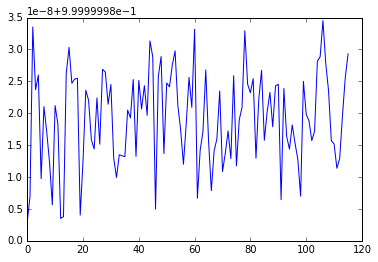

In [25]:
plt.plot(Var)

#Separate maps in substacks, sort the independent components by brain regions 

In [26]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (13, 2.5)

In [27]:
Dtemp=data[:,:,:,0]

In [28]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [29]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=Dtemp[:,:,range(Nstack)]
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        #Dmean[:,:,i]=np.max(Vmean,0)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


In [30]:
DTvar.shape

(10497, 116)

In [31]:
S

(78, 43, 9, 116)

In [32]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/New Volume/100621ss2series/MAX_100621ss2oncregcdFF20spsfkfconcatMB116Smith0_4_60IC.nii


/media/sophie/New Volume/100621ss2series/MAX_100621ss2oncregcdFF20spsfkfconcatMB116Smith0_4_60IC.nii


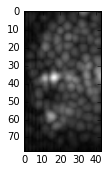

In [35]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape


if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    Dmean=np.zeros([S[0],S[1],Nstack])
    #Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean

plt.imshow(Vmean,cmap=plt.cm.gray)

0


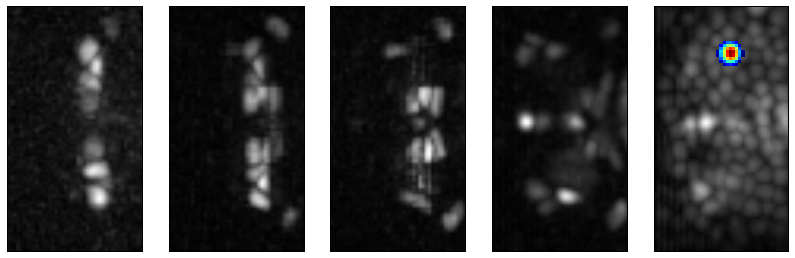

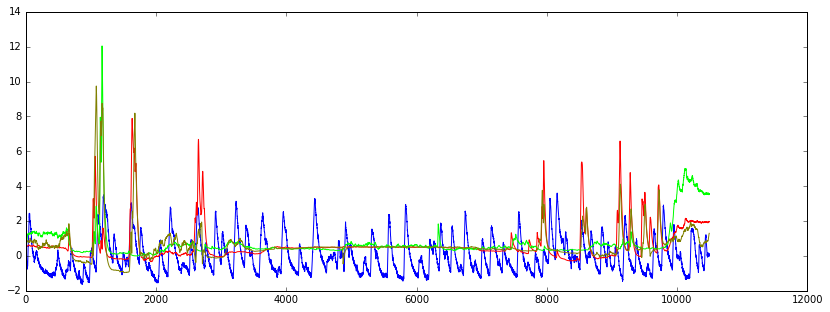

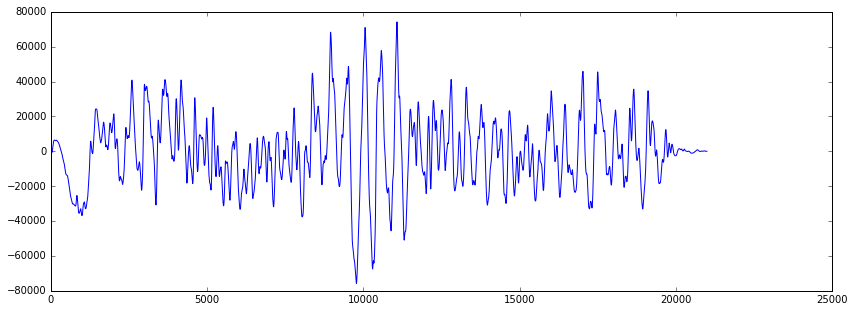

11073


In [ ]:
for j in range(S[3]):

    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,j]
            D1[:,:,i]=V 
            

    print(j)
    for i in range(Nstack):
        plt.subplot(1,5,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    plt.show()
    
   # plt.plot(TS_ROI[Order[j],:])
    plt.plot(DTvar[:,j])
    plt.plot(Xkdff[0,:]/np.std(Xkdff[0,:])+0.5,color=(1,0,0))   
    plt.plot(Xkdff[1,:]/np.std(Xkdff[1,:])+0.5,color=(0,1,0))
    plt.plot(Xkdff[2,:]/np.std(Xkdff[2,:])+0.5,color=(0.5,0.5,0))    
    #plt.plot(Xk[3,:]/np.std(Xk[1,:])+0.5,color=(0,0.5,1))
    CCry=np.correlate(DTvar[:,j],Xkdff[0,:]+Xkdff[1,:]+Xkdff[2,:],'full')
    
    plt.show()
    plt.plot(CCry-3)   
    plt.show()
    print(np.argmax(CCry))
    Label_ICs.append(raw_input())
    if Label_ICs[j]=='':
        Good_ICs[j]=0
    else:
        Good_ICs[j]=1
        
        

In [46]:
#Label_ICs[91]='gamma'


In [38]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/New Volume/100621ss2series/100621ss2seriesXk.mat


In [39]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']

In [40]:
Xksmoothed=np.zeros(Xk.shape)

Xksmoothed[0,:]=np.convolve(Xk[0,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xksmoothed[1,:]=np.convolve(Xk[1,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xksmoothed[2,:]=np.convolve(Xk[2,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xkdff=Xk-Xksmoothed

In [41]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((3,S[3]))

In [42]:
from sklearn import linear_model

In [43]:
algorithm = linear_model.LinearRegression()

In [44]:
for j in range(S[3]):
    model = algorithm.fit(Xkdff.T, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(Xkdff.T,DT[:,j])

In [45]:
max(max(Rsq))

0.57662473603742215

0
[ 0.01728461]
[ 0.00012955 -0.0001038   0.00153739]
1
[ 0.03108548]
[ -4.06104040e-04   9.39896563e-05  -3.30163357e-03]
2
[ 0.02578217]
[ 0.00013532  0.00014846  0.0006384 ]
4
[ 0.01187777]
[ -1.77224522e-05  -6.93210492e-05   4.72891288e-04]
5
[ 0.00685549]
[  2.50742430e-05   6.16408488e-05  -3.92576637e-04]
6
[ 0.09409194]
[  2.20224430e-05   2.82736348e-05   6.99463078e-05]
7
[ 0.02701614]
[  2.23138667e-05   4.54374399e-05   1.79196712e-04]
9
[ 0.05192609]
[ 0.0008331   0.00104758  0.00235151]
10
[ 0.03593022]
[ 0.0010695   0.00097956  0.00839904]
12
[ 0.00726146]
[ -6.48644383e-05  -1.49132257e-04   5.08587144e-04]
13
[ 0.00583527]
[  2.42301032e-05   1.72799235e-05  -3.11152008e-04]
14
[ 0.32894211]
[  1.17295651e-04   9.55522644e-06   2.62589055e-04]
15
[ 0.005617]
[ -2.15000676e-05   5.41799094e-05   1.06602818e-06]
16
[ 0.49526081]
[  6.75425666e-05  -8.23980732e-06   4.01192532e-04]
18
[ 0.01348817]
[ -4.69401528e-05  -2.21328880e-06  -3.74870139e-05]
19
[ 0.48610081]
[ 0

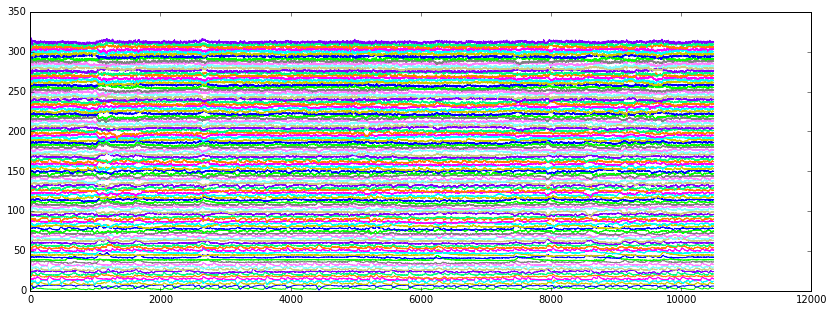

46
[ 0.00983081]
[  2.78848742e-05   5.54323865e-05  -7.68599190e-05]
87
[ 0.00948979]
[  3.94658496e-06  -8.37955696e-06   2.66872454e-05]
108
[ 0.12275377]
[ -3.38689362e-05   7.29565714e-05  -2.36667417e-04]


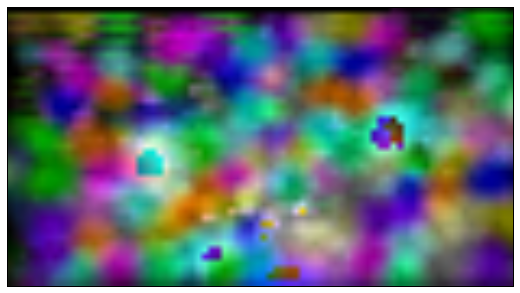

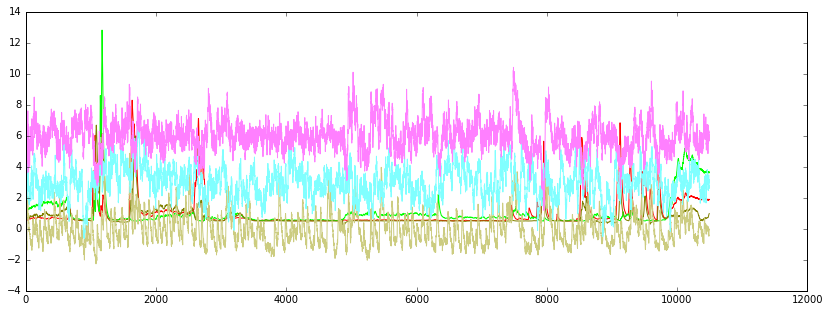

3
[ 0.07140619]
[-0.00064051 -0.00023728 -0.00077211]
11
[ 0.11347967]
[ -3.24879102e-04   5.09492026e-05  -8.08345903e-04]
17
[ 0.03189365]
[  2.54782479e-04   9.09038470e-05  -1.70586826e-04]


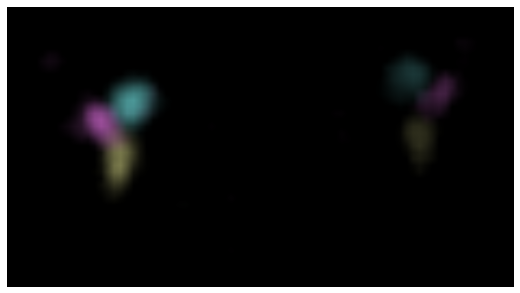

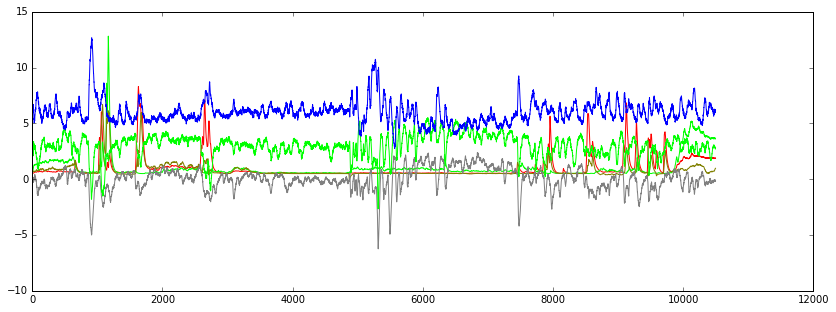

8
[ 0.17571284]
[  2.62466144e-04   5.00213333e-06   1.77234992e-03]
21
[ 0.2220488]
[-0.0001026  0.0003913 -0.0059829]
28
[ 0.30069035]
[ -1.33694075e-04   7.94178475e-05  -1.06739629e-03]
38
[ 0.09469862]
[  4.00192103e-05   9.13635019e-05   3.15565862e-04]
44
[ 0.01388484]
[-0.00023552  0.00047482 -0.00020402]
66
[ 0.07274449]
[ 0.00011817 -0.00013122  0.00062819]
[0, 1, 2, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 46, 87, 108, 3, 11, 17, 8, 21, 28, 38, 44, 66]


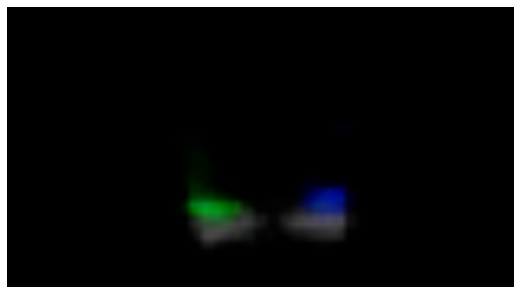

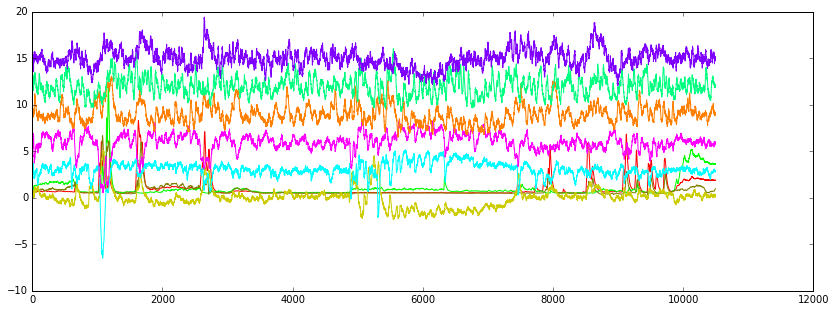

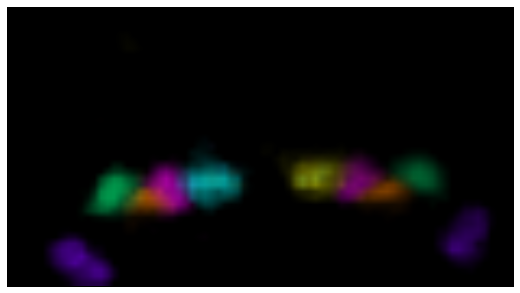

In [46]:
List1=[(Label_ICs[i],i) for i in range(S[3])]
Newlist=sorted(List1, key=lambda List1: List1[0])

Neworder=[Newlist[i][1] for i in range(S[3])]

NewDT=DTvar[:,Neworder[:]].T

for j in range(len(Neworder)):
    A=NewDT[:,j]
    V=np.sqrt(np.var(A))
    NewDT[:,j]=A/V

C1=np.zeros([16,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
C1[6][:]=(1,0.5,0)
C1[7][:]=(0,1,0.5)
C1[8][:]=(0.5,0,1)
C1[9][:]=(0.8,0.8,0.5)
C1[10][:]=(0.5,1,1)
C1[11][:]=(1,0.5,1)
C1[12]=(0.5,0.5,0.5)
C1[13]=(0.2,0.5,0.5)
C1[14]=(0.5,0.2,0.5)
C1[15]=(0.5,0.5,0.2)
h=3

Newmaps=Dmaps[:,:,:,Neworder[:]]

L=len(set([Label_ICs[Neworder[i]] for i in range(len(Neworder))]))

Regionmaps=np.zeros([S[0],S[1],L,3])
Datasort=np.zeros([S[0],S[1],S[2],L,3])

Regionname=[]

DMapsordered=Dmapso[:,:,:,Neworder[:]]

j=0
i=0
k=Label_ICs[Neworder[0]]
m=0
Regionname.append(Label_ICs[Neworder[i]])
for i in range(len(Neworder)):
    
    #C2=C1[i%6][:]
    for l in range(3):
        M=np.max(np.squeeze(np.reshape(Newmaps[:,:,:,i],S[0]*S[1]*S[2])))
        Regionmaps[:,:,j,l]=Regionmaps[:,:,j,l]+0.6*np.max(DMapsordered[:,:,:,i],2)*C1[i%12+1][l]/M
        Datasort[:,:,:,j,l]=Datasort[:,:,:,j,l]+Dmaps[:,:,:,Neworder[i]]*C1[i%15+1][l] 
    i=i+1
    m=m+1
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
        
    if k1 != k:
        j=j+1
        k=k1
        m=0
        Regionname.append(Label_ICs[Neworder[i]])

pylab.rcParams['figure.figsize'] = (14, 5)
import scipy
from scipy import ndimage
j=0
m=0
L=0
k=Label_ICs[Neworder[0]]
for i in range(len(Neworder)):
    m=m+1
    
    
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
    if k1 != k:
        
        k=k1
        m=0
        
        plt.show()
        plt.figure(2*j+1)
        Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
        IM=plt.imshow(Rotated_Plot) 
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        j=j+1
        plt.figure(2*j)
        plt.plot(Xk[0,:]/np.std(Xk[0,:])+0.5,color=(1,0,0))   
        plt.plot(Xk[1,:]/np.std(Xk[1,:])+0.5,color=(0,1,0))
        plt.plot(Xk[2,:]/np.std(Xk[1,:])+0.5,color=(0.5,0.5,0))    
        #plt.plot(Xk[3,:]/np.std(Xk[1,:])+0.5,color=(0,0.5,1))
    plt.plot(NewDT[i,:]+h*m,color=C1[i%12+1][:])
    print(Neworder[i])
    print(Rsq[:,Neworder[i]])
    print(Betas[:,Neworder[i]])
plt.figure(2*j+1)
Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
IM=plt.imshow(Rotated_Plot)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
print(Neworder)

In [35]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/New Volume/100621ss2series/100621ss2seriesXk.mat


In [36]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']